## Math genealogy

This is a website document mathematicians, their advisors and their students:

http://www.genealogy.ams.org

We start with webscraping the data, see the scraping python script I wrote. It scraped about 60000 pages in about 10 hours, however there was some formatting errors. Below I have used approximately the first 17000 entries from the genealogy project, those missing are the result of formatting and web scraping errors.

In [1]:

import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [10]:
#mathematicians = pd.read_csv('mathids_1_17000.csv', delimiter=',', index_col='mathId')

mathematicians = pd.read_csv('tmp.csv', delimiter=',', index_col='mathId')

In [11]:
years = mathematicians.thesisYear.apply(pd.to_numeric, errors='coerce')
mathematicians['numericYear'] = years

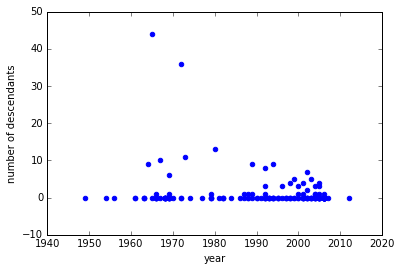

In [12]:
# a plot of year vs number of descendants
#
# as you would expect, there are several old mathematicians with huge numbers of descendants
x = mathematicians[mathematicians.numericYear.isnull() == False].numericYear
y = mathematicians[mathematicians.numericYear.isnull() == False].numDescendants
plt.scatter(x,y, color='blue')
plt.xlabel('year')
plt.ylabel('number of descendants')

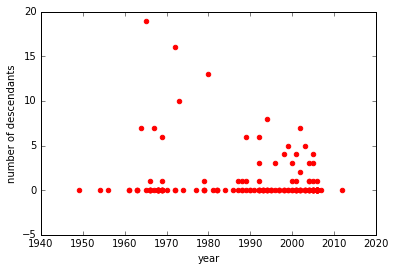

In [13]:
# a plot of the when a mathematician did their thesis against the number of students they have had
#
# the graph makes sense because those who recently earned a PhD are unlikely to have many students,
# while those who earned one a long time ago are unlikely to have many students because there weren't many students in 
# general back then.

x = mathematicians[mathematicians.numericYear.isnull() == False].numericYear
y = mathematicians[mathematicians.numericYear.isnull() == False].numStudents
plt.scatter(x,y, color='red')
plt.xlabel('year')
plt.ylabel('number of descendants')

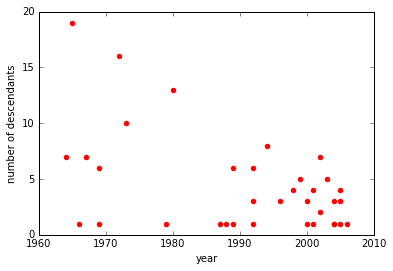

In [24]:
base_stuff = mathematicians[(mathematicians.numericYear.isnull() == False) & (mathematicians.numDescendants > 0)]
x = base_stuff.numericYear
y = base_stuff.numStudents
plt.scatter(x,y, color='red')
plt.xlabel('year')
plt.ylabel('number of descendants')

#mathematicians[mathematicians.numStudents > 0].numeric